In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
import os

In [4]:
os.getcwd()

'/content'

In [ ]:
os.chdir('drive/MyDrive/portfolio_content/PROBABILIDAD Y ESTADISTICA/estadistica_aplicada_negocios_economia')

### Ejercicio 94
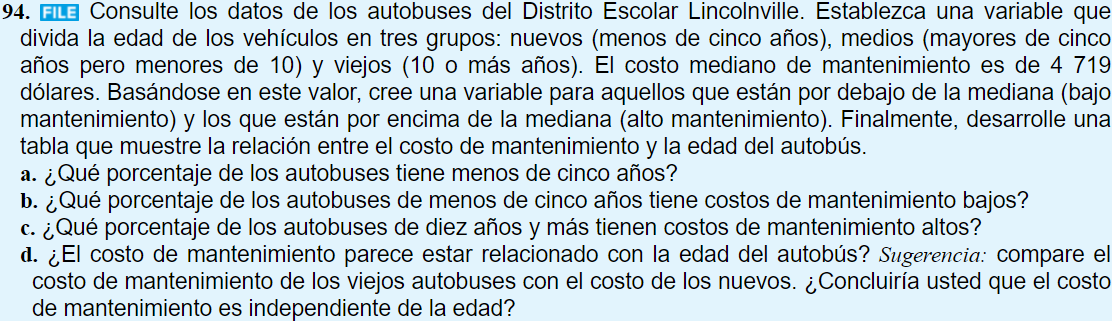

Dataset: Data about buses in Lincolnville, we can see variables as 'Maintenance cost', and 'Age' <br>
Create a table facing maintenance costs vs aging<br>
a. Percentage of buses with less than five years old<br>
b. Percentage of buses with less than five years old that has low maintenance costs<br>
c. Percentage of buses with more than ten years old that has high maintenance costs<br>
d. Maintenance costs are related to bus age?

In [6]:
buses = pd.read_excel('recursos/Lincolnville_Bus.xlsx')
buses.head()

,ID,Manufacturer,Engine Type,Engine Type (0=diesel),Capacity,Maintenance cost,Age,Odometer Miles,Miles
0,10,Keiser,Gasoline,1,14,4646,5,54375,11973
1,396,Thompson,Diesel,0,14,1072,2,21858,11969
2,122,Bluebird,Gasoline,1,55,9394,10,116580,11967
3,751,Keiser,Diesel,0,14,1078,2,22444,11948
4,279,Bluebird,Diesel,0,55,1008,2,22672,11925


In [7]:
buses['Age_cat'] = buses['Age'].map(lambda x: 0 if x < 5 else ( 1 if x <= 10 else 2)) # 0 new, 1 norm, 2 old

In [8]:
buses['Mto_cat'] = buses['Maintenance cost'].map(lambda x: 0 if x < 4719 else 1) #0 lower than norm, 1 higher than norm

In [9]:
mtovsage = pd.crosstab(buses['Mto_cat'],buses['Age_cat'])
mtovsage['Total'] = mtovsage.sum(axis=1)
mtovsage = mtovsage.append(mtovsage.sum(axis=0), ignore_index=True).rename({2:'Total'}).rename_axis('Mto_cat')

In [10]:
# Maintenance vs Age
mtovsage

Age_cat,0,1,2,Total
Mto_cat,,,,
0,18,31,0,49
1,0,27,4,31
Total,18,58,4,80


In [11]:
p_menos5 = 18/80
p_menos5_y_mtobajo = 18/80
p_mas10_y_mtoalto = 4/80
print(f'Percentage of buses with less than five years old: {p_menos5}')
print(f'Percentage of buses with less than five years old that has low maintenance costs: {p_menos5_y_mtobajo}')
print(f'Percentage of buses with more than ten years old that has high maintenance costs: {p_mas10_y_mtoalto}')

Percentage of buses with less than five years old: 0.225
Percentage of buses with less than five years old that has low maintenance costs: 0.225
Percentage of buses with more than ten years old that has high maintenance costs: 0.05


In [13]:
p_mtoalto = 31/80
p_mas10_dado_mtoalto = p_mas10_y_mtoalto / p_mtoalto

p_mtobajo = 49/80
p_mtobajo_y_mas10 = 0/80 
p_mas10_dado_mtobajo = p_mtobajo_y_mas10 / p_mtobajo

In [14]:
p_mtoalto_dado_mas10 = (p_mtoalto * p_mas10_dado_mtoalto) / ( (p_mtoalto * p_mas10_dado_mtoalto) + (p_mtobajo * p_mas10_dado_mtobajo) )

In [15]:
# Maintenance costs are related to bus age with a 100% of certainty
p_mtoalto_dado_mas10

1.0